# **Tải data**

In [1]:
# Lib
import pandas as pd
import numpy as np

base_path = '/kaggle/input/data-score/'
submission_file = f'{base_path}annonimized_processed.csv'
target_file = f'{base_path}th-public.csv'

# 1.2. Tải dữ liệu
try:
    df_submissions_processed = pd.read_csv(submission_file)
    df_target = pd.read_csv(target_file)
    print(f"Tải thành công df_submissions: {df_submissions_processed.shape}")
    print(f"Tải thành công df_target: {df_target.shape}")
    print(f"Các cột của data: {df_submissions_processed.columns}")
except Exception as e:
    print(f"LỖI: Không thể tải file. Vui lòng kiểm tra lại đường dẫn. Lỗi: {e}")
    exit()
df_submissions_processed.head(5)

Tải thành công df_submissions: (295198, 25)
Tải thành công df_target: (761, 2)
Các cột của data: Index(['assignment_id_raw', 'problem_id_raw', 'username_raw', 'is_final',
       'status', 'pre_score', 'coefficient', 'language_id_raw', 'created_at',
       'updated_at', 'judgement', 'student_id', 'language_id', 'avg_time_ms',
       'avg_memory_kb', 'num_failed_overall_tc', 'num_accepted_tc',
       'total_verdicts_tc', 'num_tc_from_array', 'num_wrong_tc', 'num_tle_tc',
       'num_mle_tc', 'num_rte_tc', 'num_ce_tc', 'is_compile_error'],
      dtype='object')


,assignment_id_raw,problem_id_raw,username_raw,is_final,status,pre_score,coefficient,language_id_raw,created_at,updated_at,...,num_failed_overall_tc,num_accepted_tc,total_verdicts_tc,num_tc_from_array,num_wrong_tc,num_tle_tc,num_mle_tc,num_rte_tc,num_ce_tc,is_compile_error
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2025-09-10 08:02:04,2025-09-10 08:06:58,...,10.0,0.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,False
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2025-09-10 08:04:41,2025-09-10 08:04:51,...,10.0,0.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,False
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2025-09-10 08:06:49,2025-09-10 08:06:58,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,False
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2025-09-10 08:47:52,2025-09-10 08:48:01,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,False
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2025-09-10 09:19:35,2025-09-10 09:19:45,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,False


In [2]:
print("\n4. Chuyển đổi kiểu dữ liệu...")
if 'is_final' in df_submissions_processed.columns:
    df_submissions_processed['is_final'] = df_submissions_processed['is_final'].astype(int)
    print("   'is_final' chuyển sang int.")
if 'pre_score' in df_submissions_processed.columns:
    df_submissions_processed['pre_score'] = pd.to_numeric(df_submissions_processed['pre_score'], errors='coerce') # errors='coerce' sẽ đổi giá trị lỗi thành NaT
    print("   'pre_score' chuyển sang numeric.")
if 'coefficient' in df_submissions_processed.columns:
    df_submissions_processed['coefficient'] = pd.to_numeric(df_submissions_processed['coefficient'], errors='coerce')
    print("   'coefficient' chuyển sang numeric.")
    
if 'created_at' in df_submissions_processed.columns:
    df_submissions_processed['created_at'] = pd.to_datetime(df_submissions_processed['created_at'], errors='coerce')
    print("   'created_at' chuyển sang datetime")
if 'updated_at' in df_submissions_processed.columns:
    df_submissions_processed['updated_at'] = pd.to_datetime(df_submissions_processed['updated_at'], errors='coerce')
    print("   'updated_at' chuyển sang datetime")


4. Chuyển đổi kiểu dữ liệu...
   'is_final' chuyển sang int.
   'pre_score' chuyển sang numeric.
   'coefficient' chuyển sang numeric.
   'created_at' chuyển sang datetime
   'updated_at' chuyển sang datetime


In [3]:
df_target.rename(columns={'hash': 'student_id', 'TH': 'score_th'}, inplace=True)
df_target.dropna(subset=['score_th'], inplace=True)
print(f"\nĐã xử lý file target. Số sinh viên có điểm TH: {len(df_target)}")

# 3. Chuyển đổi Kiểu Dữ liệu
if 'student_id' in df_target.columns:
    df_target['student_id'] = df_target['student_id'].astype(str) 
    print("\n3. 'student_id' (từ hash) giữ kiểu string.")
if 'score_th' in df_target.columns:
    df_target['score_th'] = pd.to_numeric(df_target['score_th'], errors='coerce') 
    print("   'score_th' (từ TH) chuyển sang numeric.")

# 4. Kiểm tra và Xử lý Dữ liệu Thiếu (NaN)
print("\n4. Kiểm tra dữ liệu thiếu (NaN) trong df_target đã xử lý:")
nan_counts_target = df_target.isnull().sum()
print(nan_counts_target[nan_counts_target > 0]) 

# Xử lý NaN cho score_th (loại bỏ hàng có điểm NaN) - QUAN TRỌNG
if 'score_th' in df_target.columns:
    original_len = len(df_target)
    df_target.dropna(subset=['score_th'], inplace=True)
    print(f"   Đã loại bỏ {original_len - len(df_target)} hàng có 'score_th' bị thiếu.")
    
df_target_processed = df_target.copy()
print(f"Số dòng trong df_target_processed: {len(df_target_processed)}")


Đã xử lý file target. Số sinh viên có điểm TH: 755

3. 'student_id' (từ hash) giữ kiểu string.
   'score_th' (từ TH) chuyển sang numeric.

4. Kiểm tra dữ liệu thiếu (NaN) trong df_target đã xử lý:
score_th    2
dtype: int64
   Đã loại bỏ 2 hàng có 'score_th' bị thiếu.
Số dòng trong df_target_processed: 753


# **Trích xuất đặc trưng**

## Ban đầu

In [4]:
# === BẮT ĐẦU PHẦN FEATURE ENGINEERING ===
print("--- Bắt đầu Trích xuất Đặc trưng (Feature Engineering) ---")


# 1. Chuẩn bị Dữ liệu Nền tảng cho Feature Engineering
print("\n1. Chuẩn bị dữ liệu nền tảng...")

# Chỉ làm việc với các submission đã được chấm (không 'pending')
df_non_pending_submissions = df_submissions_processed[df_submissions_processed['status'] != 'pending'].copy()
print(f"    Số lượng submission không 'pending': {len(df_non_pending_submissions)}")

# Xác định điểm tối đa để định nghĩa "thành công"
if df_non_pending_submissions.empty or df_non_pending_submissions['pre_score'].isnull().all():
    print("LƯU Ý: Không có submission hợp lệ để tính MAX_PRE_SCORE. Đặt mặc định là 100.0")
    MAX_PRE_SCORE = 100.0
else:
    MAX_PRE_SCORE = float(df_non_pending_submissions['pre_score'].max())
print(f"    Điểm tối đa (MAX_PRE_SCORE) được xác định là: {MAX_PRE_SCORE}")

# Tạo các cột tính toán trong df_non_pending_submissions
df_non_pending_submissions['actual_score'] = df_non_pending_submissions['pre_score'] * (df_non_pending_submissions['coefficient'] / 100.0)
df_non_pending_submissions['is_successful_submission'] = (df_non_pending_submissions['pre_score'] == MAX_PRE_SCORE)
df_non_pending_submissions['is_error_submission'] = \
    (df_non_pending_submissions['is_compile_error'] == True) | \
    (df_non_pending_submissions['status'].isin(['Compilation Error', 'Syntax Error']))
print("    Đã tạo các cột 'actual_score', 'is_successful_submission', 'is_error_submission'.")


# Nhóm theo student_id để tổng hợp
grouped_all_submissions = df_submissions_processed.groupby('student_id')
grouped_non_pending = df_non_pending_submissions.groupby('student_id')

# DataFrame để lưu trữ tất cả các features của sinh viên
df_student_features = pd.DataFrame(index=df_submissions_processed['student_id'].unique())
df_student_features.index.name = 'student_id'


print("\n2. Tính toán các nhóm đặc trưng...")

# --- a. Hoạt động Tổng quát của Sinh viên ---
print("    a. Đặc trưng hoạt động tổng quát...")
df_student_features['total_submissions'] = grouped_all_submissions.size()
df_student_features['num_pending_submissions'] = df_submissions_processed[df_submissions_processed['status'] == 'pending'].groupby('student_id').size()
df_student_features['num_unique_problems_attempted'] = grouped_all_submissions['problem_id_raw'].nunique()
df_student_features['num_unique_assignments_attempted'] = grouped_all_submissions['assignment_id_raw'].nunique()
df_student_features['num_unique_languages_used'] = grouped_all_submissions['language_id'].nunique()
df_student_features['days_active'] = (grouped_all_submissions['created_at'].max() - grouped_all_submissions['created_at'].min()).dt.days

# --- b. Đặc trưng về Điểm số ---
print("    b. Đặc trưng về điểm số...")
agg_funcs_score = ['mean', 'median', 'max', 'sum', 'std']
pre_score_agg = grouped_non_pending['pre_score'].agg(agg_funcs_score).add_prefix('pre_score_')
df_student_features = df_student_features.join(pre_score_agg, how='left')
actual_score_agg = grouped_non_pending['actual_score'].agg(agg_funcs_score).add_prefix('actual_score_')
df_student_features = df_student_features.join(actual_score_agg, how='left')

# --- c. Đặc trưng Dựa trên Định nghĩa "Thành công" ---
print("    c. Đặc trưng về 'thành công'...")
df_student_features['num_problems_MAX_PRE_SCORE_achieved'] = df_non_pending_submissions[
    df_non_pending_submissions['is_successful_submission']
].groupby('student_id')['problem_id_raw'].nunique()
df_student_features['rate_successful_submissions'] = grouped_non_pending['is_successful_submission'].mean()

# --- d. Đặc trưng từ `coefficient` ---
print("    d. Đặc trưng từ 'coefficient'...")
coeff_agg = grouped_non_pending['coefficient'].agg(['mean', 'min', 'std']).add_prefix('coefficient_')
df_student_features = df_student_features.join(coeff_agg, how='left')

# --- e. Đặc trưng về Lỗi và Trạng thái ---
print("    e. Đặc trưng về lỗi và trạng thái...")
df_student_features['non_pending_error_rate'] = grouped_non_pending['is_error_submission'].mean()
status_counts = df_non_pending_submissions.groupby('student_id')['status'].value_counts().unstack(fill_value=0)
status_counts = status_counts.add_prefix('count_status_')
df_student_features = df_student_features.join(status_counts, how='left')

# Đặc trưng từ judgement trên các lần chạy không lỗi biên dịch
df_ok_runs = df_non_pending_submissions[~df_non_pending_submissions['is_error_submission']]
if not df_ok_runs.empty:
    grouped_ok_runs = df_ok_runs.groupby('student_id')
    for col in ['num_wrong_tc', 'num_tle_tc', 'num_mle_tc', 'num_rte_tc']:
        df_student_features[f'avg_{col}_ok_runs'] = grouped_ok_runs[col].mean()

# --- f. Đặc trưng về Thời gian ---
print("    f. Đặc trưng về thời gian...")
def avg_time_diff_hours(series):
    if len(series) < 2: return np.nan
    return series.sort_values().diff().mean().total_seconds() / 3600.0

df_student_features['avg_time_between_submissions_hours'] = grouped_all_submissions['created_at'].apply(avg_time_diff_hours)
df_student_features['submission_hour_mode'] = grouped_all_submissions['created_at'].apply(lambda x: x.dt.hour.mode()[0] if not x.empty and not x.dt.hour.mode().empty else np.nan)
def weekend_rate(series):
    # Lấy ngày trong tuần, bỏ NaT
    dow = series.dt.dayofweek.dropna()
    if dow.empty:
        return np.nan
    # Tính tỷ lệ ngày cuối tuần
    return (dow >= 5).mean()

df_student_features['weekend_submission_rate'] = \
    grouped_all_submissions['created_at'].apply(weekend_rate)



# --- g. Đặc trưng từ các Lần nộp `is_final == 1` ---
print("    g. Đặc trưng từ các lần nộp is_final=1...")
df_final = df_non_pending_submissions[df_non_pending_submissions['is_final'] == 1].copy()
if not df_final.empty:
    grouped_final = df_final.groupby('student_id')
    df_student_features['num_final_submissions'] = grouped_final.size()
    final_score_agg = grouped_final['actual_score'].agg(['mean', 'max', 'std']).add_prefix('final_actual_score_')
    df_student_features = df_student_features.join(final_score_agg, how='left')
    df_student_features['rate_successful_final_submissions'] = grouped_final['is_successful_submission'].mean()


# 3. Xử lý NaN cuối cùng
print("\n3. Xử lý NaN trong df_student_features cuối cùng...")
# Điền 0 cho hầu hết các cột, vì NaN thường có nghĩa là "không có" (không có submission, không có lỗi, etc.)
# Có thể áp dụng các chiến lược phức tạp hơn nếu cần
df_student_features.fillna(0, inplace=True)


# 4. Hoàn thành
print("\n--- HOÀN THÀNH TRÍCH XUẤT ĐẶC TRƯNG ---")
if df_student_features.index.name == 'student_id':
    df_student_features.reset_index(inplace=True)

print(f"Số lượng sinh viên trong df_student_features: {len(df_student_features)}")
print(f"Số lượng đặc trưng được tạo (bao gồm student_id): {len(df_student_features.columns)}")
print("\n5 dòng đầu của df_student_features:")
print(df_student_features.head())

--- Bắt đầu Trích xuất Đặc trưng (Feature Engineering) ---

1. Chuẩn bị dữ liệu nền tảng...
    Số lượng submission không 'pending': 295188
    Điểm tối đa (MAX_PRE_SCORE) được xác định là: 10000.0
    Đã tạo các cột 'actual_score', 'is_successful_submission', 'is_error_submission'.

2. Tính toán các nhóm đặc trưng...
    a. Đặc trưng hoạt động tổng quát...
    b. Đặc trưng về điểm số...
    c. Đặc trưng về 'thành công'...
    d. Đặc trưng từ 'coefficient'...
    e. Đặc trưng về lỗi và trạng thái...
    f. Đặc trưng về thời gian...
    g. Đặc trưng từ các lần nộp is_final=1...

3. Xử lý NaN trong df_student_features cuối cùng...

--- HOÀN THÀNH TRÍCH XUẤT ĐẶC TRƯNG ---
Số lượng sinh viên trong df_student_features: 1489
Số lượng đặc trưng được tạo (bao gồm student_id): 38

5 dòng đầu của df_student_features:
                                 student_id  total_submissions  \
0  ed9eaeb6a707f50154024b24d7efcb874a9795dd                139   
1  ba12c0a2cb367af0467e479c03507c71a805d291      

## Cải tiến

In [5]:
print("--- Bắt đầu Phần 1: Cải tiến Đặc trưng  ---")

if 'df_submissions_processed' not in locals() or 'df_student_features' not in locals():
    print("LỖI: Cần df_submissions_processed và df_student_features từ các bước trước.")
    exit()

# 1.1. Chuẩn bị dữ liệu nền tảng
print("\n Chuẩn bị dữ liệu nền tảng cho việc tạo feature mới...")
df_non_pending = df_submissions_processed[df_submissions_processed['status'] != 'pending'].copy()

if not df_non_pending.empty:
    df_non_pending['is_successful_submission'] = (df_non_pending['pre_score'] == MAX_PRE_SCORE)
    
    df_non_pending_sorted = df_non_pending.sort_values(by=['student_id', 'problem_id_raw', 'created_at'])

    # 1.2. Tạo đặc trưng mới và thêm vào df_student_features
    print("Tạo và thêm các đặc trưng mới một cách an toàn...")
    
    # a) num_problems_solved_on_first_try
    first_submissions = df_non_pending_sorted.groupby(['student_id', 'problem_id_raw']).first().reset_index()
    first_try_successes = first_submissions[first_submissions['is_successful_submission']]
    num_first_try_solved = first_try_successes.groupby('student_id').size().rename('num_problems_solved_on_first_try')
    
    if 'num_problems_solved_on_first_try' in df_student_features.columns:
        df_student_features = df_student_features.drop(columns=['num_problems_solved_on_first_try'])
    df_student_features = df_student_features.merge(num_first_try_solved, on='student_id', how='left')

    # b) submission_to_success_ratio`
    successful_submission_counts = df_non_pending.groupby('student_id')['is_successful_submission'].sum()
    non_pending_submission_counts = df_non_pending.groupby('student_id').size()
    submission_to_success_ratio = (successful_submission_counts / non_pending_submission_counts.replace(0, np.nan)).rename('submission_to_success_ratio')
    
    if 'submission_to_success_ratio' in df_student_features.columns:
        df_student_features = df_student_features.drop(columns=['submission_to_success_ratio'])
    df_student_features = df_student_features.merge(submission_to_success_ratio, on='student_id', how='left')
    
    # c) max_consecutive_failed_submissions
    def get_max_consecutive_failures(group):
        is_successful = group['is_successful_submission']
        failure_blocks = is_successful.groupby((is_successful != is_successful.shift()).cumsum())
        max_failures = failure_blocks.apply(lambda x: len(x) if not x.iloc[0] else 0).max()
        return max_failures

    consecutive_failures_per_problem = df_non_pending_sorted.groupby(['student_id', 'problem_id_raw']).apply(get_max_consecutive_failures)
    max_consecutive_failures_per_student = consecutive_failures_per_problem.groupby('student_id').max().rename('max_consecutive_failed_submissions')

    if 'max_consecutive_failed_submissions' in df_student_features.columns:
        df_student_features = df_student_features.drop(columns=['max_consecutive_failed_submissions'])
    df_student_features = df_student_features.merge(max_consecutive_failures_per_student, on='student_id', how='left')
    
    # Điền NaN cho các feature mới
    df_student_features.fillna(0, inplace=True)
    print("   Đã hoàn thành tạo các đặc trưng mới.")
else:
    print("   Không có submission không 'pending' để tạo feature mới.")
    
print(f"   Tổng số đặc trưng hiện tại: {len(df_student_features.columns)}")

--- Bắt đầu Phần 1: Cải tiến Đặc trưng  ---

 Chuẩn bị dữ liệu nền tảng cho việc tạo feature mới...
Tạo và thêm các đặc trưng mới một cách an toàn...
   Đã hoàn thành tạo các đặc trưng mới.
   Tổng số đặc trưng hiện tại: 41


/tmp/ipykernel_19/1186503589.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_failures_per_problem = df_non_pending_sorted.groupby(['student_id', 'problem_id_raw']).apply(get_max_consecutive_failures)


# **Chuẩn bị dữ liệu huấn luyện**

In [6]:
print("--- DANH SÁCH CÁC CỘT FEATURES HIỆN CÓ ---")
feature_list = df_student_features.columns.tolist()
# Bỏ cột 'student_id' ra khỏi danh sách features dùng để huấn luyện
if 'student_id' in feature_list:
    feature_list.remove('student_id')

print(f"Tổng số features: {len(feature_list)}")
print(feature_list)

--- DANH SÁCH CÁC CỘT FEATURES HIỆN CÓ ---
Tổng số features: 40
['total_submissions', 'num_pending_submissions', 'num_unique_problems_attempted', 'num_unique_assignments_attempted', 'num_unique_languages_used', 'days_active', 'pre_score_mean', 'pre_score_median', 'pre_score_max', 'pre_score_sum', 'pre_score_std', 'actual_score_mean', 'actual_score_median', 'actual_score_max', 'actual_score_sum', 'actual_score_std', 'num_problems_MAX_PRE_SCORE_achieved', 'rate_successful_submissions', 'coefficient_mean', 'coefficient_min', 'coefficient_std', 'non_pending_error_rate', 'count_status_Compilation Error', 'count_status_SCORE', 'count_status_Syntax Error', 'avg_num_wrong_tc_ok_runs', 'avg_num_tle_tc_ok_runs', 'avg_num_mle_tc_ok_runs', 'avg_num_rte_tc_ok_runs', 'avg_time_between_submissions_hours', 'submission_hour_mode', 'weekend_submission_rate', 'num_final_submissions', 'final_actual_score_mean', 'final_actual_score_max', 'final_actual_score_std', 'rate_successful_final_submissions', 'num_p

In [7]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print("\n1. Chuẩn bị dữ liệu cho mô hình...")
df_student_features['student_id'] = df_student_features['student_id'].astype(str)
df_target_processed['student_id'] = df_target_processed['student_id'].astype(str)
df_final_for_modeling = pd.merge(df_student_features, df_target_processed, on='student_id', how='inner')

if df_final_for_modeling.empty:
    print("LỖI: Sau khi merge, không có dữ liệu nào để huấn luyện.")
    exit()

print(f"   Số lượng sinh viên có cả đặc trưng và điểm TH (sau merge): {len(df_final_for_modeling)}")

X = df_final_for_modeling.drop(columns=['student_id', 'score_th'])
y = df_final_for_modeling['score_th']
print(f"Số lượng mẫu: {X.shape}")
print(f"Số lượng target: {y.shape}")
if X.isnull().values.any():
    print("LƯU Ý: Có giá trị NaN trong tập đặc trưng X. Điền NaN bằng 0 cho ví dụ này.")
    X = X.fillna(0) 



1. Chuẩn bị dữ liệu cho mô hình...
   Số lượng sinh viên có cả đặc trưng và điểm TH (sau merge): 753
Số lượng mẫu: (753, 40)
Số lượng target: (753,)



--- Bắt đầu quy trình lựa chọn feature cuối cùng bằng RFECV ---
Lưu ý: Quá trình này có thể mất nhiều thời gian...
-> RFECV sẽ chạy trên 40 features.
Các feature hạng mục được phát hiện cho RFECV: []
Fitting estimator with 40 features.
Fitting estimator with 39 features.

-> RFECV đã tìm thấy 38 feature là tối ưu nhất.
Danh sách các feature được chọn: ['total_submissions', 'num_unique_problems_attempted', 'num_unique_assignments_attempted', 'num_unique_languages_used', 'days_active', 'pre_score_mean', 'pre_score_median', 'pre_score_max', 'pre_score_sum', 'pre_score_std', 'actual_score_mean', 'actual_score_median', 'actual_score_max', 'actual_score_sum', 'actual_score_std', 'num_problems_MAX_PRE_SCORE_achieved', 'rate_successful_submissions', 'coefficient_mean', 'coefficient_min', 'coefficient_std', 'non_pending_error_rate', 'count_status_Compilation Error', 'count_status_SCORE', 'avg_num_wrong_tc_ok_runs', 'avg_num_tle_tc_ok_runs', 'avg_num_mle_tc_ok_runs', 'avg_num_rte_tc_ok_runs', '

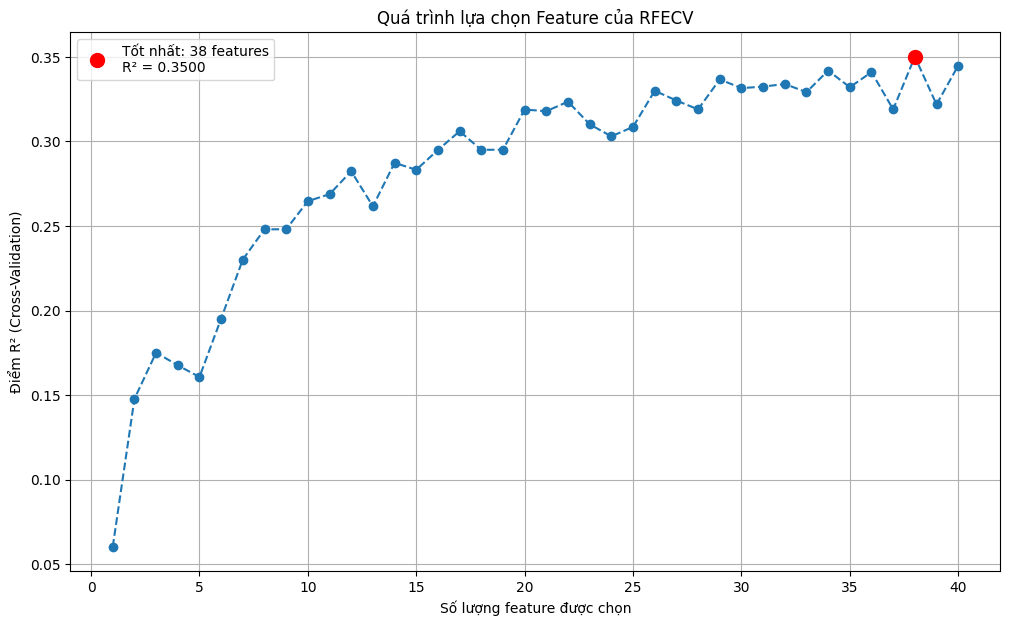

In [8]:
# ==============================================================================
# SỬ DỤNG RFECV ĐỂ LỌC RA BỘ FEATURE TỐI ƯU CUỐI CÙNG
# ==============================================================================
from sklearn.feature_selection import RFECV
from catboost import CatBoostRegressor 
import matplotlib.pyplot as plt

print("\n--- Bắt đầu quy trình lựa chọn feature cuối cùng bằng RFECV ---")
print("Lưu ý: Quá trình này có thể mất nhiều thời gian...")


print(f"-> RFECV sẽ chạy trên {X.shape[1]} features.")


# 2. Xác định các cột hạng mục (nếu có trong bộ feature cuối cùng)
# Ví dụ: is_low_activity là một feature hạng mục tiềm năng
categorical_features_names = X.select_dtypes(include=['category', 'object']).columns.tolist()
if 'is_low_activity' in X.columns:
    if 'is_low_activity' not in categorical_features_names:
        categorical_features_names.append('is_low_activity')
print("Các feature hạng mục được phát hiện cho RFECV:", categorical_features_names)


# 3. Khởi tạo mô hình CatBoost sẽ được dùng bên trong RFECV
# Dùng ít iterations hơn để quá trình chạy nhanh hơn
estimator_for_rfe = CatBoostRegressor(
    random_state=42,
    iterations=300,  # Giảm bớt số vòng lặp cho nhanh
    cat_features=categorical_features_names,
    verbose=0
)

# 4. Khởi tạo và chạy RFECV
# cv=3: Dùng 3-fold cross-validation để đánh giá (cân bằng giữa tốc độ và độ tin cậy)
# scoring='r2': Mục tiêu là tối đa hóa điểm R²
selector = RFECV(
    estimator=estimator_for_rfe,
    step=1,          # Mỗi lần loại bỏ 1 feature
    cv=3,            
    scoring='r2',
    n_jobs=-1,       # Sử dụng tất cả các nhân CPU
    verbose=1        # Hiển thị tiến trình
)

selector.fit(X, y)

# 5. Lấy kết quả và trực quan hóa
final_optimal_features = X.columns[selector.support_]
print(f"\n-> RFECV đã tìm thấy {selector.n_features_} feature là tối ưu nhất.")
print("Danh sách các feature được chọn:", list(final_optimal_features))

# Vẽ biểu đồ để xem quá trình lựa chọn
plt.figure(figsize=(12, 7))
plt.title('Quá trình lựa chọn Feature của RFECV')
plt.xlabel("Số lượng feature được chọn")
plt.ylabel("Điểm R² (Cross-Validation)")
# Lấy kết quả điểm từ RFECV
cv_results = selector.cv_results_['mean_test_score']
plt.plot(range(1, len(cv_results) + 1), cv_results, marker='o', linestyle='--')

# Đánh dấu điểm tốt nhất
best_n_features = selector.n_features_
best_score = cv_results[best_n_features-1]
plt.plot(best_n_features, best_score, 'ro', markersize=10, label=f'Tốt nhất: {best_n_features} features\nR² = {best_score:.4f}')

plt.legend()
plt.grid()
plt.show()

In [9]:
features_list = list(final_optimal_features)

In [10]:
# Chia train/val
X_new = X[features_list]
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train.shape

(602, 38)

In [11]:

def predict_and_save(model, df_to_predict, feature_list , output_filename, id_column='student_id'):
    """
    Hàm này thực hiện dự đoán trên một tập dữ liệu, xử lý kết quả
    và lưu ra file submission theo định dạng yêu cầu.

    Args:
        model: Mô hình đã được huấn luyện (trained model object).
        df_to_predict (pd.DataFrame): DataFrame chứa đặc trưng của các sinh viên cần dự đoán.
        feature_list (list): Danh sách tên các cột đặc trưng để dự đoán.
        output_filename (str): Tên file để lưu kết quả.
        id_column (str): Tên cột chứa ID sinh viên.
    """
    print(f"\n--- Bắt đầu dự đoán với mô hình: {type(model).__name__} ---")

    # 1. Chuẩn bị dữ liệu đặc trưng để dự đoán
    X_predict = df_to_predict[feature_list]
    
    # 2. Thực hiện dự đoán
    print(f"Thực hiện dự đoán trên {len(X_predict)} sinh viên...")
    predictions = model.predict(X_predict)
    
    # 3. Xử lý kết quả dự đoán (Post-processing)
    df_result = df_to_predict[[id_column]].copy()
    df_result['predicted_score'] = predictions
    
    # Kẹp điểm dự đoán trong khoảng [0, 10] để đảm bảo hợp lệ
    df_result['predicted_score'] = df_result['predicted_score'].round(1)
    df_result['predicted_score'] = df_result['predicted_score'].clip(0, 10)
    
    print("Đã kẹp (clip) các giá trị dự đoán trong khoảng [0, 10].")
    
    # 4. In ra một vài dòng kết quả để kiểm tra
    print("\n5 dòng đầu của kết quả dự đoán:")
    print(df_result.head())

    # 5. Lưu file submission
    try:
        df_result.to_csv(output_filename, index=False, header=False, float_format='%.4f')
        print(f"\nThành công! Đã lưu kết quả vào file: '{output_filename}'")
    except Exception as e:
        print(f"\nLỖI: Không thể lưu file. Lỗi: {e}")

# **Model**

## *Catboost*

In [12]:
# Huấn luyện
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score

# 4.2. Định nghĩa không gian tham số cho CatBoost
print("\n Định nghĩa không gian tìm kiếm siêu tham số cho CatBoost...")
catboost_param_grid = {
    'learning_rate': uniform(0.01, 0.05),
    'iterations': randint(800, 1000),
    'depth': randint(4, 8),
    'l2_leaf_reg': uniform(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bylevel': uniform(0.5, 0.5),
    'random_strength': uniform(0, 8),
    'border_count': [64, 128],
}

# 4.3. Khởi tạo và chạy RandomizedSearchCV
print("\n4.3. Bắt đầu quá trình tinh chỉnh CatBoost...")
catboost_reg = cb.CatBoostRegressor(random_state=42, silent=True)

catboost_search = RandomizedSearchCV(
    estimator=catboost_reg,
    param_distributions=catboost_param_grid,
    n_iter=25, # Nên tăng n_iter để tìm kiếm tốt hơn
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


catboost_search.fit(X_train, y_train, early_stopping_rounds=50)

print(f"\n      -> Tham số tốt nhất của CatBoost: {catboost_search.best_params_}")
print(f"\n      -> R² tốt nhất tìm được cho CatBoost: {catboost_search.best_score_:.4f}")

best_model_cb = catboost_search.best_estimator_
y_pred = best_model_cb.predict(X_val)

print("Test R² score:", r2_score(y_val, y_pred))
print("\n4.4. Lấy mô hình CatBoost cuối cùng đã được huấn luyện...")

print("\n✅ Hoàn thành! Đã lấy ra mô hình `final_catboost_model` tốt nhất, sẵn sàng để dự đoán.")


 Định nghĩa không gian tìm kiếm siêu tham số cho CatBoost...

4.3. Bắt đầu quá trình tinh chỉnh CatBoost...
Fitting 5 folds for each of 25 candidates, totalling 125 fits

      -> Tham số tốt nhất của CatBoost: {'border_count': 64, 'colsample_bylevel': 0.647816842918857, 'depth': 4, 'iterations': 933, 'l2_leaf_reg': 7.565345704829102, 'learning_rate': 0.02092202186084168, 'random_strength': 3.3320795829629297, 'subsample': 0.9533121035675474}

      -> R² tốt nhất tìm được cho CatBoost: 0.3998
Test R² score: 0.33486765233873184

4.4. Lấy mô hình CatBoost cuối cùng đã được huấn luyện...

✅ Hoàn thành! Đã lấy ra mô hình `final_catboost_model` tốt nhất, sẵn sàng để dự đoán.


In [13]:
all_student_ids = df_student_features['student_id'].unique()
students_with_scores_ids = df_target_processed['student_id'].unique()
students_to_predict_ids = np.setdiff1d(all_student_ids, students_with_scores_ids)

print(f"-> Tìm thấy {len(students_to_predict_ids)} sinh viên cần dự đoán.")

if len(students_to_predict_ids) > 0:
    df_predict_data = df_student_features[df_student_features['student_id'].isin(students_to_predict_ids)]

    predict_and_save(
        model=best_model_cb,
        df_to_predict=df_predict_data,
        feature_list=features_list, 
        output_filename='catboost_predict.txt',
        id_column='student_id',
        # Thêm score_column_name nếu cần
    )

else:
    print("Không có sinh viên nào cần dự đoán.")

-> Tìm thấy 736 sinh viên cần dự đoán.

--- Bắt đầu dự đoán với mô hình: CatBoostRegressor ---
Thực hiện dự đoán trên 736 sinh viên...
Đã kẹp (clip) các giá trị dự đoán trong khoảng [0, 10].

5 dòng đầu của kết quả dự đoán:
                                 student_id  predicted_score
0  ed9eaeb6a707f50154024b24d7efcb874a9795dd              7.9
1  ba12c0a2cb367af0467e479c03507c71a805d291              8.4
3  b7298b0fe50443a623af9b56792b330c2d052845              8.2
4  c60be70309789b39355dc612f36e37090ccad5dc              7.3
6  a22a58c5be8aa2c2700619e37f2b7a6e4efa7e6b              8.2

Thành công! Đã lưu kết quả vào file: 'catboost_predict.txt'


## *LightGBM*

In [14]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score

# --- Bắt đầu phần Tinh chỉnh & Huấn luyện LightGBM ---
print("\n5.1. Định nghĩa không gian tìm kiếm siêu tham số cho LightGBM...")
lgbm_param_grid = {
    'learning_rate': uniform(0.01, 0.05),      
    'n_estimators': randint(100, 500),        
    'num_leaves': randint(20, 60),            
    'max_depth': randint(5, 15),               
    'subsample': uniform(0.6, 0.4),            
    'colsample_bytree': uniform(0.5, 0.5)            
}

# 5.2. Khởi tạo và chạy RandomizedSearchCV
print("\n5.2. Bắt đầu quá trình tinh chỉnh LightGBM...")
lgbm_reg = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)

# Thiết lập Randomized Search
lgbm_search = RandomizedSearchCV(
    estimator=lgbm_reg,
    param_distributions=lgbm_param_grid,
    n_iter=20, 
    scoring='r2',
    cv=5,
    verbose=-1,
    random_state=42,
    n_jobs=-1
)


# Huấn luyện mô hình với early stopping
lgbm_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print(f"\n      -> Tham số tốt nhất của LightGBM: {lgbm_search.best_params_}")
print(f"\n      -> R² tốt nhất tìm được cho LightGBM: {lgbm_search.best_score_:.4f}")

best_model_lgbm = lgbm_search.best_estimator_
y_pred = best_model_lgbm.predict(X_val)

print("Test R² score:", r2_score(y_val, y_pred))
print("\n5.3. Lấy mô hình LightGBM cuối cùng đã được huấn luyện...")
print("\n✅ Hoàn thành! Đã lấy ra mô hình `final_lgbm_model` tốt nhất, sẵn sàng để dự đoán.")



5.1. Định nghĩa không gian tìm kiếm siêu tham số cho LightGBM...

5.2. Bắt đầu quá trình tinh chỉnh LightGBM...

      -> Tham số tốt nhất của LightGBM: {'colsample_bytree': 0.5779972601681014, 'learning_rate': 0.012904180608409973, 'max_depth': 12, 'n_estimators': 472, 'num_leaves': 55, 'subsample': 0.6571467271687763}

      -> R² tốt nhất tìm được cho LightGBM: 0.3542
Test R² score: 0.3576465248941937

5.3. Lấy mô hình LightGBM cuối cùng đã được huấn luyện...

✅ Hoàn thành! Đã lấy ra mô hình `final_lgbm_model` tốt nhất, sẵn sàng để dự đoán.


In [15]:
# DỰ đoán
if len(students_to_predict_ids) > 0:
    df_predict_data = df_student_features[df_student_features['student_id'].isin(students_to_predict_ids)]

    predict_and_save(
        model=best_model_lgbm,
        df_to_predict=df_predict_data,
        feature_list=features_list, 
        output_filename='lgb_predict.txt',
        id_column='student_id',
        # Thêm score_column_name nếu cần
    )

else:
    print("Không có sinh viên nào cần dự đoán.")


--- Bắt đầu dự đoán với mô hình: LGBMRegressor ---
Thực hiện dự đoán trên 736 sinh viên...
Đã kẹp (clip) các giá trị dự đoán trong khoảng [0, 10].

5 dòng đầu của kết quả dự đoán:
                                 student_id  predicted_score
0  ed9eaeb6a707f50154024b24d7efcb874a9795dd              8.3
1  ba12c0a2cb367af0467e479c03507c71a805d291              8.0
3  b7298b0fe50443a623af9b56792b330c2d052845              8.5
4  c60be70309789b39355dc612f36e37090ccad5dc              7.2
6  a22a58c5be8aa2c2700619e37f2b7a6e4efa7e6b              8.0

Thành công! Đã lưu kết quả vào file: 'lgb_predict.txt'


# *XGBoost*

In [16]:
# Tinh chỉnh và huấn luyện
# Cần các thư viện này
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# --- Bắt đầu phần Tinh chỉnh & Huấn luyện XGBoost ---

# 6.1. Định nghĩa không gian tìm kiếm siêu tham số cho XGBoost
print("\n6.1. Định nghĩa không gian tìm kiếm siêu tham số cho XGBoost...")
xgb_param_grid = {
    'learning_rate': uniform(0.01, 0.05),    
    'n_estimators': randint(100, 1000),        
    'max_depth': randint(3, 10),               
    'subsample': uniform(0.6, 0.4),           
    'colsample_bytree': uniform(0.5, 0.5),           
}

# 6.2. Khởi tạo và chạy RandomizedSearchCV
print("\n6.2. Bắt đầu quá trình tinh chỉnh XGBoost...")
# objective='reg:squarederror' là mục tiêu cho bài toán hồi quy
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1, tree_method = "hist", device = "cuda")

# Thiết lập Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=xgb_param_grid,
    n_iter=20,  # Số lần thử kết hợp tham số
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Bắt đầu quá trình tìm kiếm trên tập huấn luyện (X_train, y_train)
# Giả định X_train, y_train đã tồn tại từ trước
xgb_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print(f"\n      -> Tham số tốt nhất của XGBoost: {xgb_search.best_params_}")
print(f"\n      -> R² tốt nhất tìm được cho XGBoost: {xgb_search.best_score_:.4f}")


# 6.3. Lấy mô hình XGBoost tốt nhất đã được huấn luyện sẵn
print("\n6.3. Lấy mô hình XGBoost cuối cùng đã được huấn luyện...")

# Không cần huấn luyện lại!
best_model_xgb = xgb_search.best_estimator_
y_pred = best_model_xgb.predict(X_val)

print("Test R² score:", r2_score(y_val, y_pred))

print("\n✅ Hoàn thành! Đã lấy ra mô hình `final_xgb_model` tốt nhất, sẵn sàng để dự đoán.")


6.1. Định nghĩa không gian tìm kiếm siêu tham số cho XGBoost...

6.2. Bắt đầu quá trình tinh chỉnh XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [18:30:05] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [18:30:05] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 fe

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 fe

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [18:30:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [18:30:16] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo


      -> Tham số tốt nhất của XGBoost: {'colsample_bytree': 0.8058265802441404, 'learning_rate': 0.01035331526098587, 'max_depth': 3, 'n_estimators': 660, 'subsample': 0.8099098641033556}

      -> R² tốt nhất tìm được cho XGBoost: 0.3626

6.3. Lấy mô hình XGBoost cuối cùng đã được huấn luyện...
Test R² score: 0.34031604552852734

✅ Hoàn thành! Đã lấy ra mô hình `final_xgb_model` tốt nhất, sẵn sàng để dự đoán.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [18:34:38] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [17]:
# #Dự đoán
if len(students_to_predict_ids) > 0:
    df_predict_data = df_student_features[df_student_features['student_id'].isin(students_to_predict_ids)]

    predict_and_save(
        model=best_model_xgb,
        df_to_predict=df_predict_data,
        feature_list=features_list, 
        output_filename='xgb_predict.txt',
        id_column='student_id',
        # Thêm score_column_name nếu cần
    )

else:
    print("Không có sinh viên nào cần dự đoán.")


--- Bắt đầu dự đoán với mô hình: XGBRegressor ---
Thực hiện dự đoán trên 736 sinh viên...
Đã kẹp (clip) các giá trị dự đoán trong khoảng [0, 10].

5 dòng đầu của kết quả dự đoán:
                                 student_id  predicted_score
0  ed9eaeb6a707f50154024b24d7efcb874a9795dd              7.4
1  ba12c0a2cb367af0467e479c03507c71a805d291              8.4
3  b7298b0fe50443a623af9b56792b330c2d052845              8.7
4  c60be70309789b39355dc612f36e37090ccad5dc              7.5
6  a22a58c5be8aa2c2700619e37f2b7a6e4efa7e6b              8.1

Thành công! Đã lưu kết quả vào file: 'xgb_predict.txt'


# *Ridge*

In [18]:
from sklearn.linear_model import Ridge
from scipy.stats import loguniform

print("\n8.1. Định nghĩa không gian tìm kiếm siêu tham số cho Ridge...")
ridge_param_grid = {
    'alpha': loguniform(1e-1, 1e3) 
}

# 8.2. Khởi tạo và chạy RandomizedSearchCV
print("\n8.2. Bắt đầu quá trình tinh chỉnh Ridge...")
ridge_model = Ridge()

ridge_search = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=ridge_param_grid,
    n_iter=25,  
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Bắt đầu tìm kiếm
ridge_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print(f"\n      -> Tham số tốt nhất của Ridge: {ridge_search.best_params_}")
print(f"\n      -> R² tốt nhất tìm được cho Ridge: {ridge_search.best_score_:.4f}")

# 8.3. Lấy mô hình Ridge tốt nhất đã được huấn luyện sẵn
print("\n8.3. Lấy mô hình Ridge cuối cùng đã được huấn luyện...")
best_model_ridge = ridge_search.best_estimator_
y_pred = best_model_ridge.predict(X_val)

print("Test R² score:", r2_score(y_val, y_pred))

print("\n✅ Hoàn thành! Đã lấy ra mô hình `final_ridge_model` tốt nhất, sẵn sàng để dự đoán.")


8.1. Định nghĩa không gian tìm kiếm siêu tham số cho Ridge...

8.2. Bắt đầu quá trình tinh chỉnh Ridge...
Fitting 5 folds for each of 25 candidates, totalling 125 fits

      -> Tham số tốt nhất của Ridge: {'alpha': 0.5415244119402537}

      -> R² tốt nhất tìm được cho Ridge: 0.3601

8.3. Lấy mô hình Ridge cuối cùng đã được huấn luyện...
Test R² score: 0.16418663042819093

✅ Hoàn thành! Đã lấy ra mô hình `final_ridge_model` tốt nhất, sẵn sàng để dự đoán.


In [19]:
# # Dự đoán
if len(students_to_predict_ids) > 0:
    df_predict_data = df_student_features[df_student_features['student_id'].isin(students_to_predict_ids)]

    predict_and_save(
        model=best_model_ridge,
        df_to_predict=df_predict_data,
        feature_list=features_list, 
        output_filename='ridge_predict.txt',
        id_column='student_id',
        # Thêm score_column_name nếu cần
    )

else:
    print("Không có sinh viên nào cần dự đoán.")


--- Bắt đầu dự đoán với mô hình: Ridge ---
Thực hiện dự đoán trên 736 sinh viên...
Đã kẹp (clip) các giá trị dự đoán trong khoảng [0, 10].

5 dòng đầu của kết quả dự đoán:
                                 student_id  predicted_score
0  ed9eaeb6a707f50154024b24d7efcb874a9795dd              7.1
1  ba12c0a2cb367af0467e479c03507c71a805d291              8.6
3  b7298b0fe50443a623af9b56792b330c2d052845              8.1
4  c60be70309789b39355dc612f36e37090ccad5dc              7.3
6  a22a58c5be8aa2c2700619e37f2b7a6e4efa7e6b              8.5

Thành công! Đã lưu kết quả vào file: 'ridge_predict.txt'
